# Telcom Customer Churn Analysis

## Introduction 

**What is customer churn?**

Customer churn, also known as customer attrition, is the process of a business losing customers over time. It occurs when customers stop using a business' products or stop subscribing to business' services, or switch to a competitor or even when they pass on.

**Why is the impact of customer churn?**

Customer churn is important because it can have a significant impact on a business's bottom line. It costs more to acquire a new customer than to retain an existing one. Additionally, churn can lead to lost revenue, decreased brand loyalty, and negative word-of-mouth marketing - by churned cutomers.

**What are the benefits of performing a customer churn analysis?**

Performing a customer churn analysis can help businesses to:

- Understand the factors that are contributing to customer churn
- Identify at-risk customers and take proactive steps to retain them
- Develop strategies to reduce customer churn rates
- Improve the overall customer experience


This churn analysis was conducted to identify the key reasons why customers are canceling their subscriptions and to develop recommendations for reducing churn. The analysis aimed at finding out posible solution to:

- **_High-level customers churn_**: Are we losing high-value customer?

- **_Service delivery_**: Customers are missing out on key features that are available from competitors.

- **_Customer support_**: Customers are not satisfied with the level of customer support they are receiving.

**Overview of the report**

This report presents the results of a customer churn analysis for a fictitious telcom company for the fiscal quarter ennded (Q2 2022). The report includes the following sections:

- **_Data Preparation_**: This section describes the data set used for the analysis and any data cleaning or preprocessing steps that were performed.

- **_Exploratory Data Analysis_**: This section visualizes the data to identify key trends and patterns, analyzes customer churn rates by different customer segments, and identifies key factors that are correlated with customer churn.

- **_Recommendations_**: This section provides recommendations for how to reduce customer churn based on the findings of the analysis.

- **_Conclusion_**: This section summarizes the key findings of the report and discusses the implications of the findings for the business.

## Data Preparation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# customize the plots
plt.rcParams['figure.figsize'] = [12, 6]
sns.set(style='dark')
sns.set(rc={'figure.dpi': 300})
sns.set(font='Times New Roman')
sns.despine(left=True, right=True, top=True, bottom=True)
cmap_color=sns.color_palette("Blues", as_cmap=True)

<Figure size 3600x1800 with 0 Axes>

In [2]:
df=pd.read_csv(r'Data\telecom_customer_churn.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

In [3]:
# modify the  column names for easy column referencing
df.columns=df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['customer_id', 'gender', 'age', 'married', 'number_of_dependents',
       'city', 'zip_code', 'latitude', 'longitude', 'number_of_referrals',
       'tenure_in_months', 'offer', 'phone_service',
       'avg_monthly_long_distance_charges', 'multiple_lines',
       'internet_service', 'internet_type', 'avg_monthly_gb_download',
       'online_security', 'online_backup', 'device_protection_plan',
       'premium_tech_support', 'streaming_tv', 'streaming_movies',
       'streaming_music', 'unlimited_data', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charge', 'total_charges', 'total_refunds',
       'total_extra_data_charges', 'total_long_distance_charges',
       'total_revenue', 'customer_status', 'churn_category', 'churn_reason'],
      dtype='object')

#### Columns Category
##### Customer Information
- customer_id
- gender
- age
- married
- number_of_dependents
- city
- zip_code
- latitude
- longitude

##### Subscription and Usage
- number_of_referrals
- tenure_in_months
- offer
- phone_service
- avg_monthly_long_distance_charges
- multiple_lines
- internet_service
- internet_type
- avg_monthly_gb_download
- online_security
- online_backup
- device_protection_plan
- premium_tech_support
- streaming_tv
- streaming_movies
- streaming_music
- unlimited_data
- contract
- paperless_billing

##### Financial Information
- payment_method
- monthly_charge
- total_charges
- total_refunds
- total_extra_data_charges
- total_long_distance_charges
- total_revenue

##### Customer Status and Churn
- customer_status
- churn_category
- churn_reason

## Exploratory Data Analysis

### Overall Churn Rate and Number of customers per Customer Status 

In [4]:
grouped_customers=df.groupby('customer_status')['customer_id'].count().reset_index(name='number_of_customers')\
    .sort_values(by='number_of_customers', ascending=False)
grouped_customers

,customer_status,number_of_customers
2,Stayed,4720
0,Churned,1869
1,Joined,454


In [5]:
# Calculate Overall Churn Rate
grouped_customers_values=grouped_customers.values

# Filter Customers who Churned 
churned_customers = grouped_customers_values[grouped_customers_values[:, 0] == 'Churned']

# Calculate the churn rate by dividing the number of churned customers by the total number of customers
churn_rate = churned_customers.shape[0] / grouped_customers_values.shape[0]
print(f'Churn Rate: {round(churn_rate*100,2)}%')

Churn Rate: 33.33%


### Churn Rate per Customer Status, Contract type and Internet service, 

In [6]:
def calculate_churn_rate_per_category(df, groupby_columns, result_column_name=None):
    """
    This function calculates the churn rate for a given DataFrame.

    Parameters
    ----------
    df : pandas.DataFrame
        The input DataFrame.
    groupby_columns : list of str
        The column names to group by.
    result_column_name : str
        The name of the column in the resulting DataFrame.

    Returns
    -------
    pandas.DataFrame
    """
    # Group by 'city' and 'customer_status' and count the number of customers
    grouped = df.groupby(groupby_columns)['customer_id'].count().reset_index(name='number_of_customers')

    # Pivot the table to have 'city' as columns
    pivoted = grouped.pivot(index=groupby_columns[0], columns=groupby_columns[1], values='number_of_customers').fillna(0)

    # Calculate the churn rate (Churned / Total)
    pivoted['Churn Rate'] = round((pivoted['Churned'] / (pivoted['Churned'] + (pivoted['Stayed']+pivoted['Joined'])))*100,2)

    # Reset the index to make 'city' a regular column
    result = pivoted.reset_index()

    # Rename the columns for clarity
    result.columns.name = None  # Remove the column name
    result = result.rename(columns={groupby_columns[0]: result_column_name})

    return result


In [7]:
# churn by contract type
churn_by_contract=calculate_churn_rate_per_category(df,['contract','customer_status'],result_column_name='Contract Type')
churn_by_contract.sort_values(by='Churn Rate',ascending=False)

,Contract Type,Churned,Joined,Stayed,Churn Rate
0,Month-to-Month,1655,408,1547,45.84
1,One Year,166,24,1360,10.71
2,Two Year,48,22,1813,2.55


In [8]:
# Churn by internet type
churn_by_internet_type=calculate_churn_rate_per_category(df,['internet_type','customer_status'],result_column_name='Internet Type')
churn_by_internet_type.sort_values(by='Churn Rate', ascending=False)

,Internet Type,Churned,Joined,Stayed,Churn Rate
2,Fiber Optic,1236,101,1698,40.72
0,Cable,213,56,561,25.66
1,DSL,307,115,1230,18.58


### Churn Rate per distribution of age, monthly downloads and tenure

In [9]:
def churn_rate_plot_per_distribution(df, column_name):
    """
    This function creates an interactive bar and scatter plot of the churn rate by a given column name using Plotly and Seaborn.

    Parameters:
    df (Pandas DataFrame): The DataFrame that contains the customer data.
    column_name (str): The name of the column for which the churn rate is calculated. It should be a categorical variable.
    plot_title (str): The title for the plot.

    Returns:
    None. The function displays the plot in the output.
    
    """
    def calculate_churn_rate(df, column_name):
        # This is a helper function that calculates the churn rate by a given column name
        churn = df[df['customer_status'] == 'Churned'].groupby(column_name).size() / df.groupby(column_name).size()
        return pd.DataFrame({
                column_name:churn.index,
                'churn':churn.values
        })
    
    churn = calculate_churn_rate(df, column_name)
    sns.jointplot(
        kind='hex',
        x=column_name,
        y='churn',
        data=churn,
        cmap='Blues',
        gridsize=20
    );


#### Churn Rate Vs Age

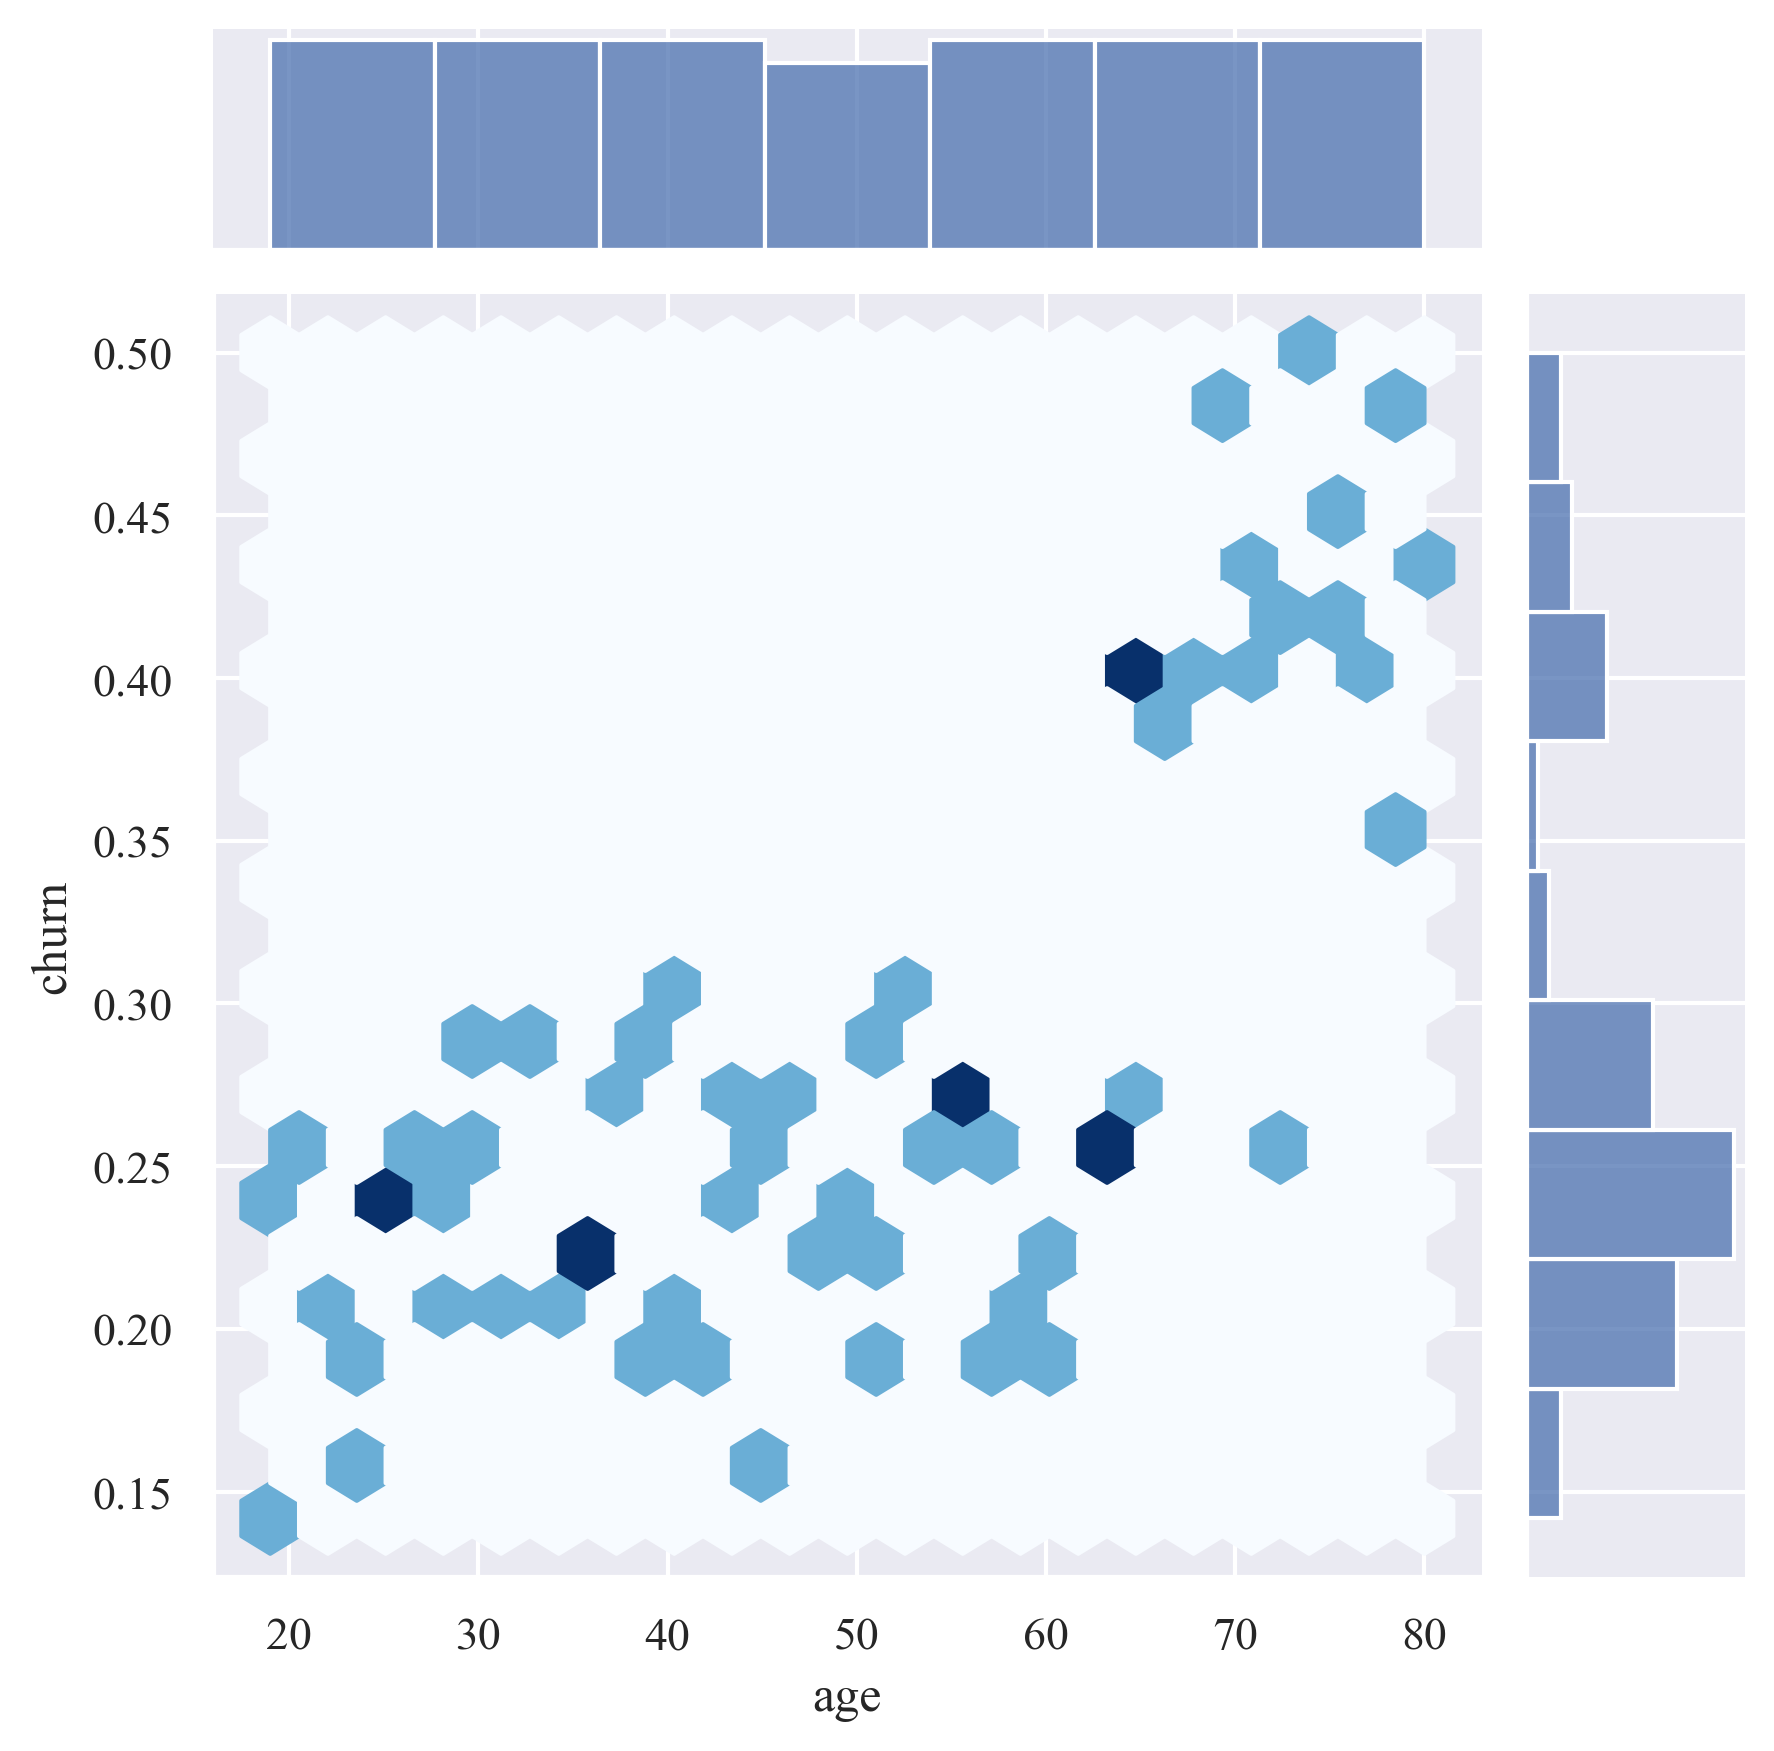

In [10]:
churn_rate_plot_per_distribution(df,'age')

#### Churn Rate Vs Tenure

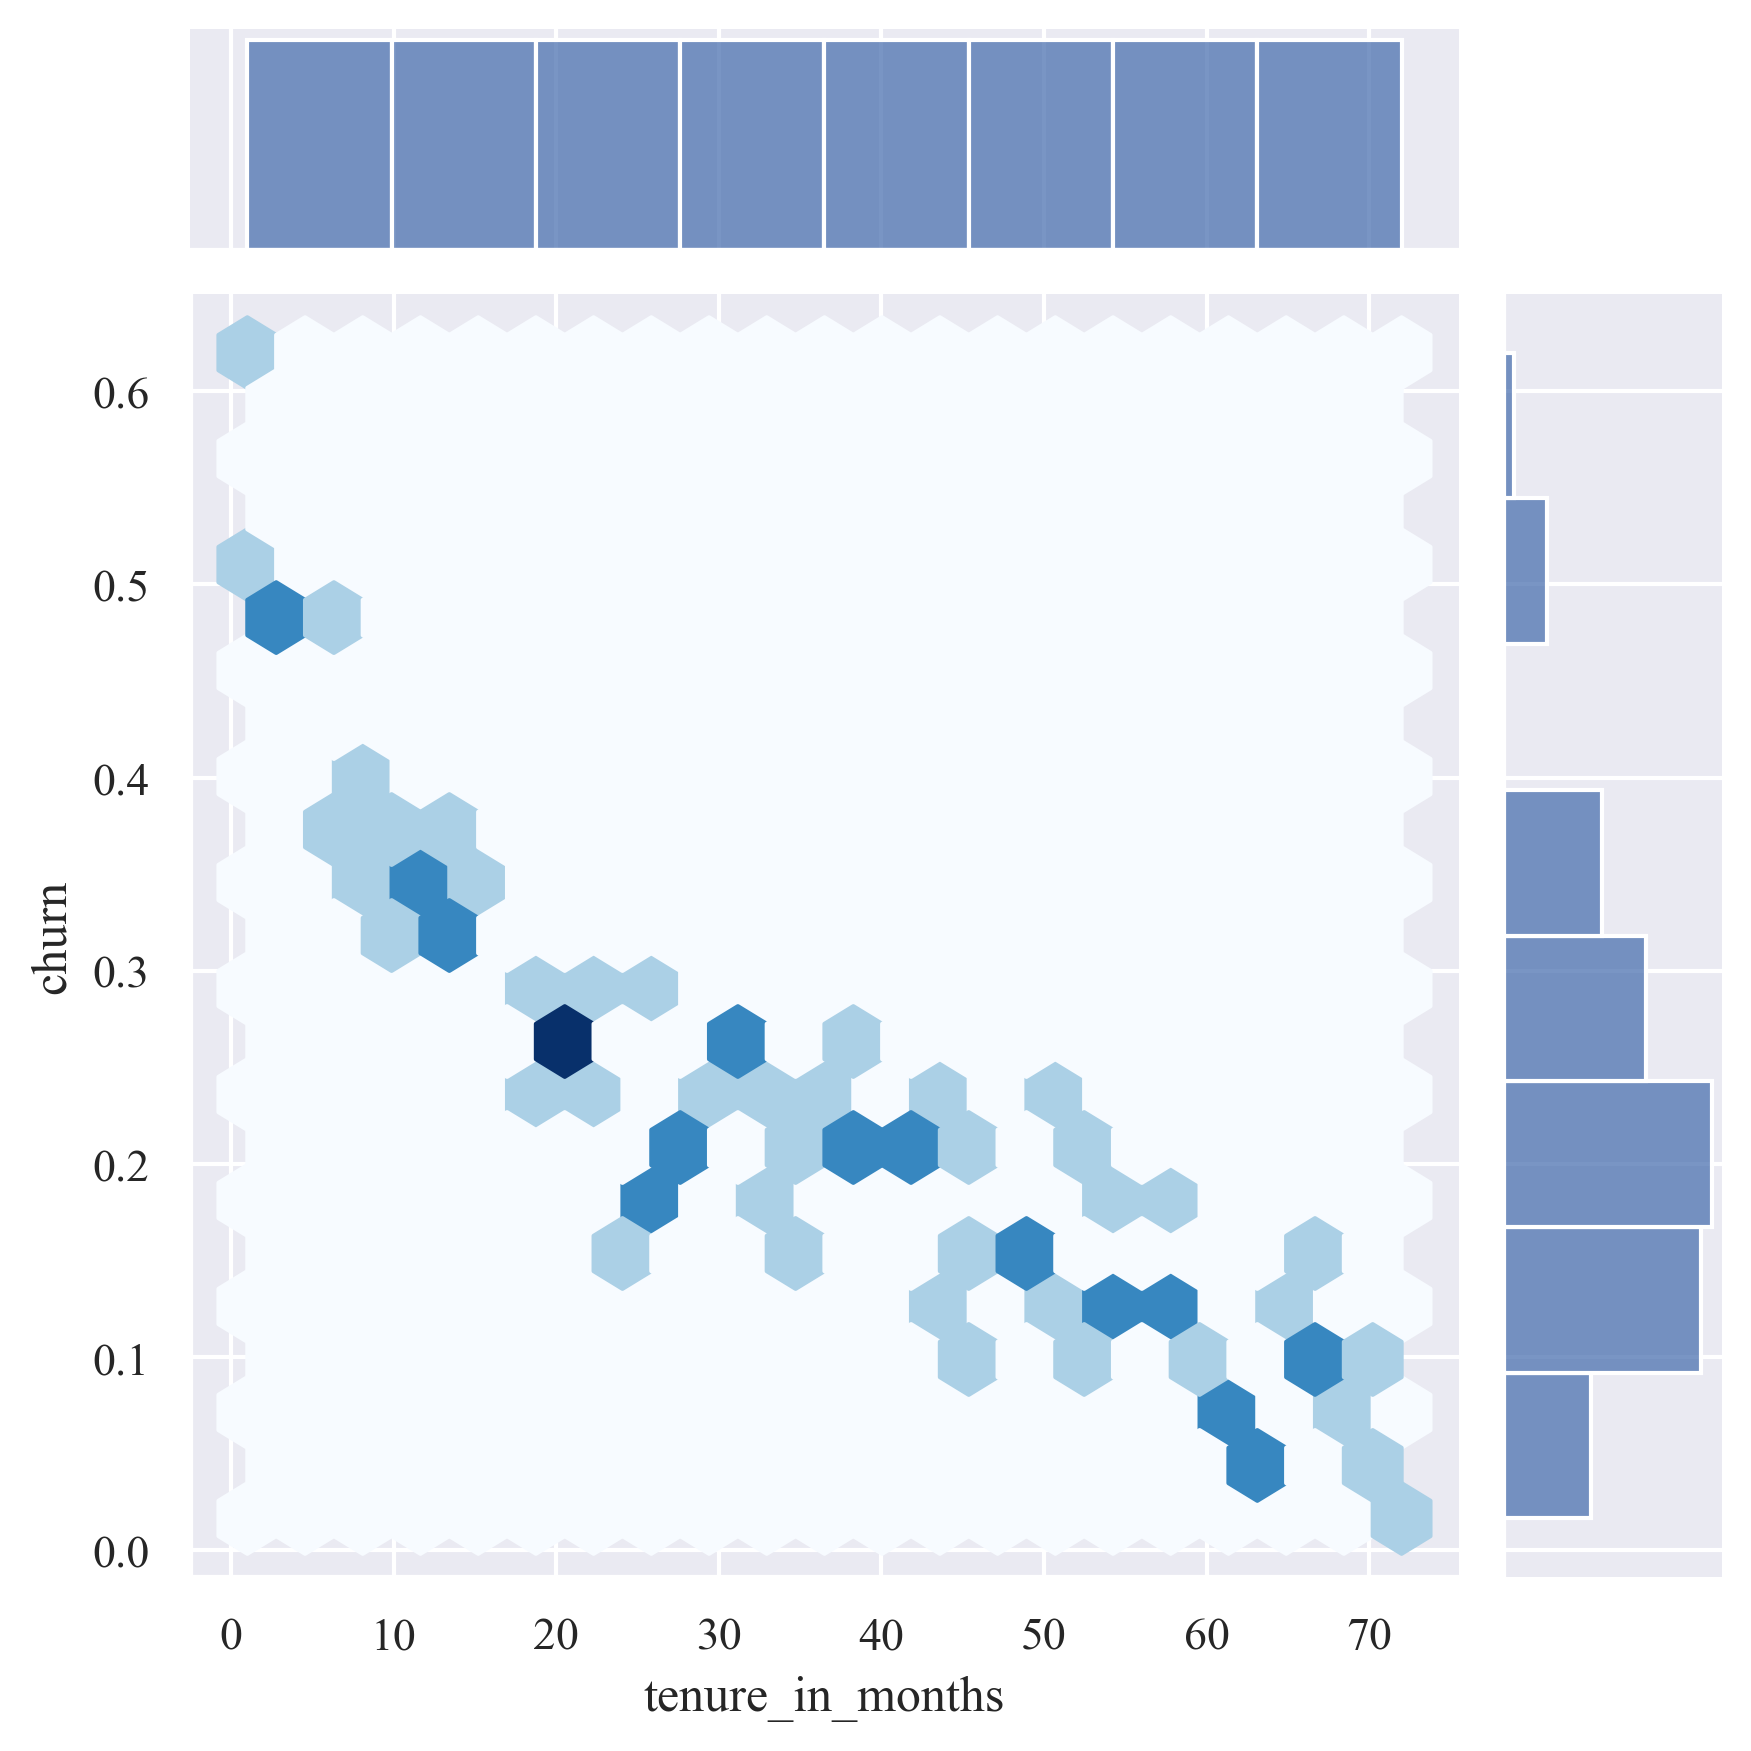

In [11]:
churn_rate_plot_per_distribution(df,'tenure_in_months')

#### Churn Rate Vs Monthly GB Download

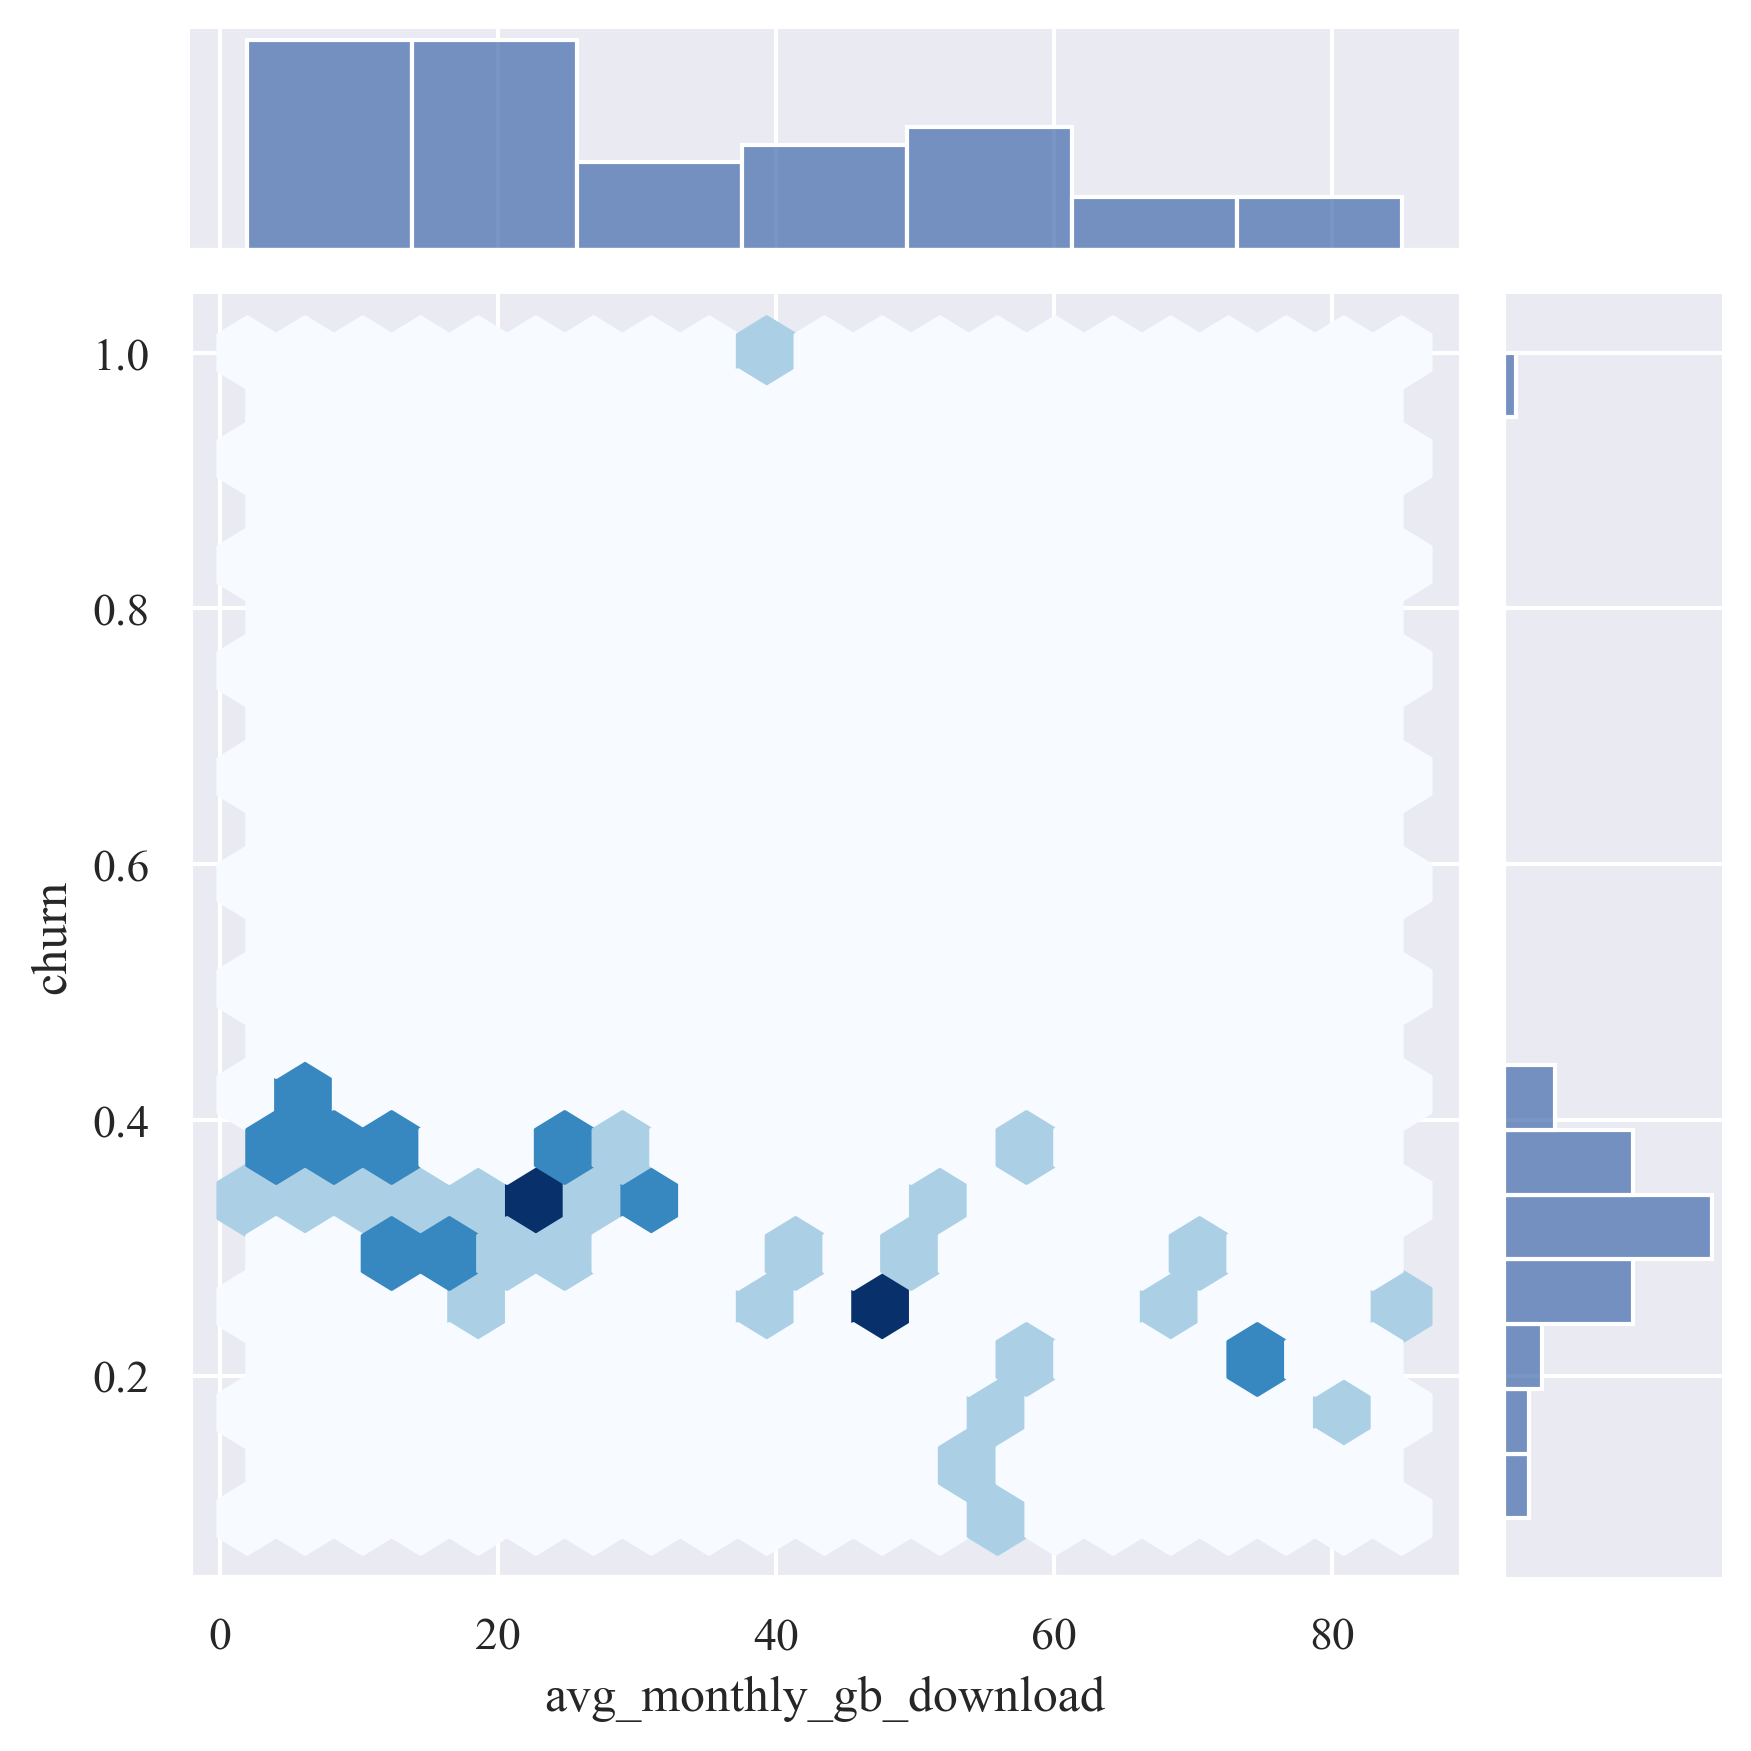

In [12]:
churn_rate_plot_per_distribution(df,'avg_monthly_gb_download')

### Churn rate across internet type, customer gender based on churn category

In [13]:
def plot_heatmap(df, group_columns, index_columns, pivot_columns, value_column, cmap='Blues', fill_value=0, title=None):
    """
    Plot a heatmap based on the provided DataFrame.

    Args:
        df (DataFrame): The input DataFrame containing the data to be visualized.
        group_columns (list): A list of columns to group the data by.
        index_columns (list): A list of columns to use as the index when pivoting the DataFrame.
        pivot_columns (list): A list of columns to use as columns when pivoting the DataFrame.
        value_column (str): The name of the column to be used as values for the heatmap.
        cmap (str, optional): The colormap to be used for the heatmap. Default is 'Blues'.
        fill_value (int, optional): The fill value for missing values in the pivot table. Default is 0.

    Returns:
        None
    """
    # Group the DataFrame and calculate percentages
    grouped = df.groupby(group_columns)[value_column].size() / df.groupby(index_columns)[value_column].size()
    grouped = grouped.reset_index(name='percentage')
    grouped['percentage'] = (round(grouped['percentage'] * 100, 2)).astype('int64')

    # Pivot the DataFrame
    pivot_table = pd.pivot_table(grouped, values='percentage', index=index_columns, columns=pivot_columns, fill_value=fill_value)

    # Plot the heatmap
    sns.heatmap(pivot_table, cmap=cmap, annot=True)
    plt.title(title)
    plt.xlabel('')
    plt.ylabel('');

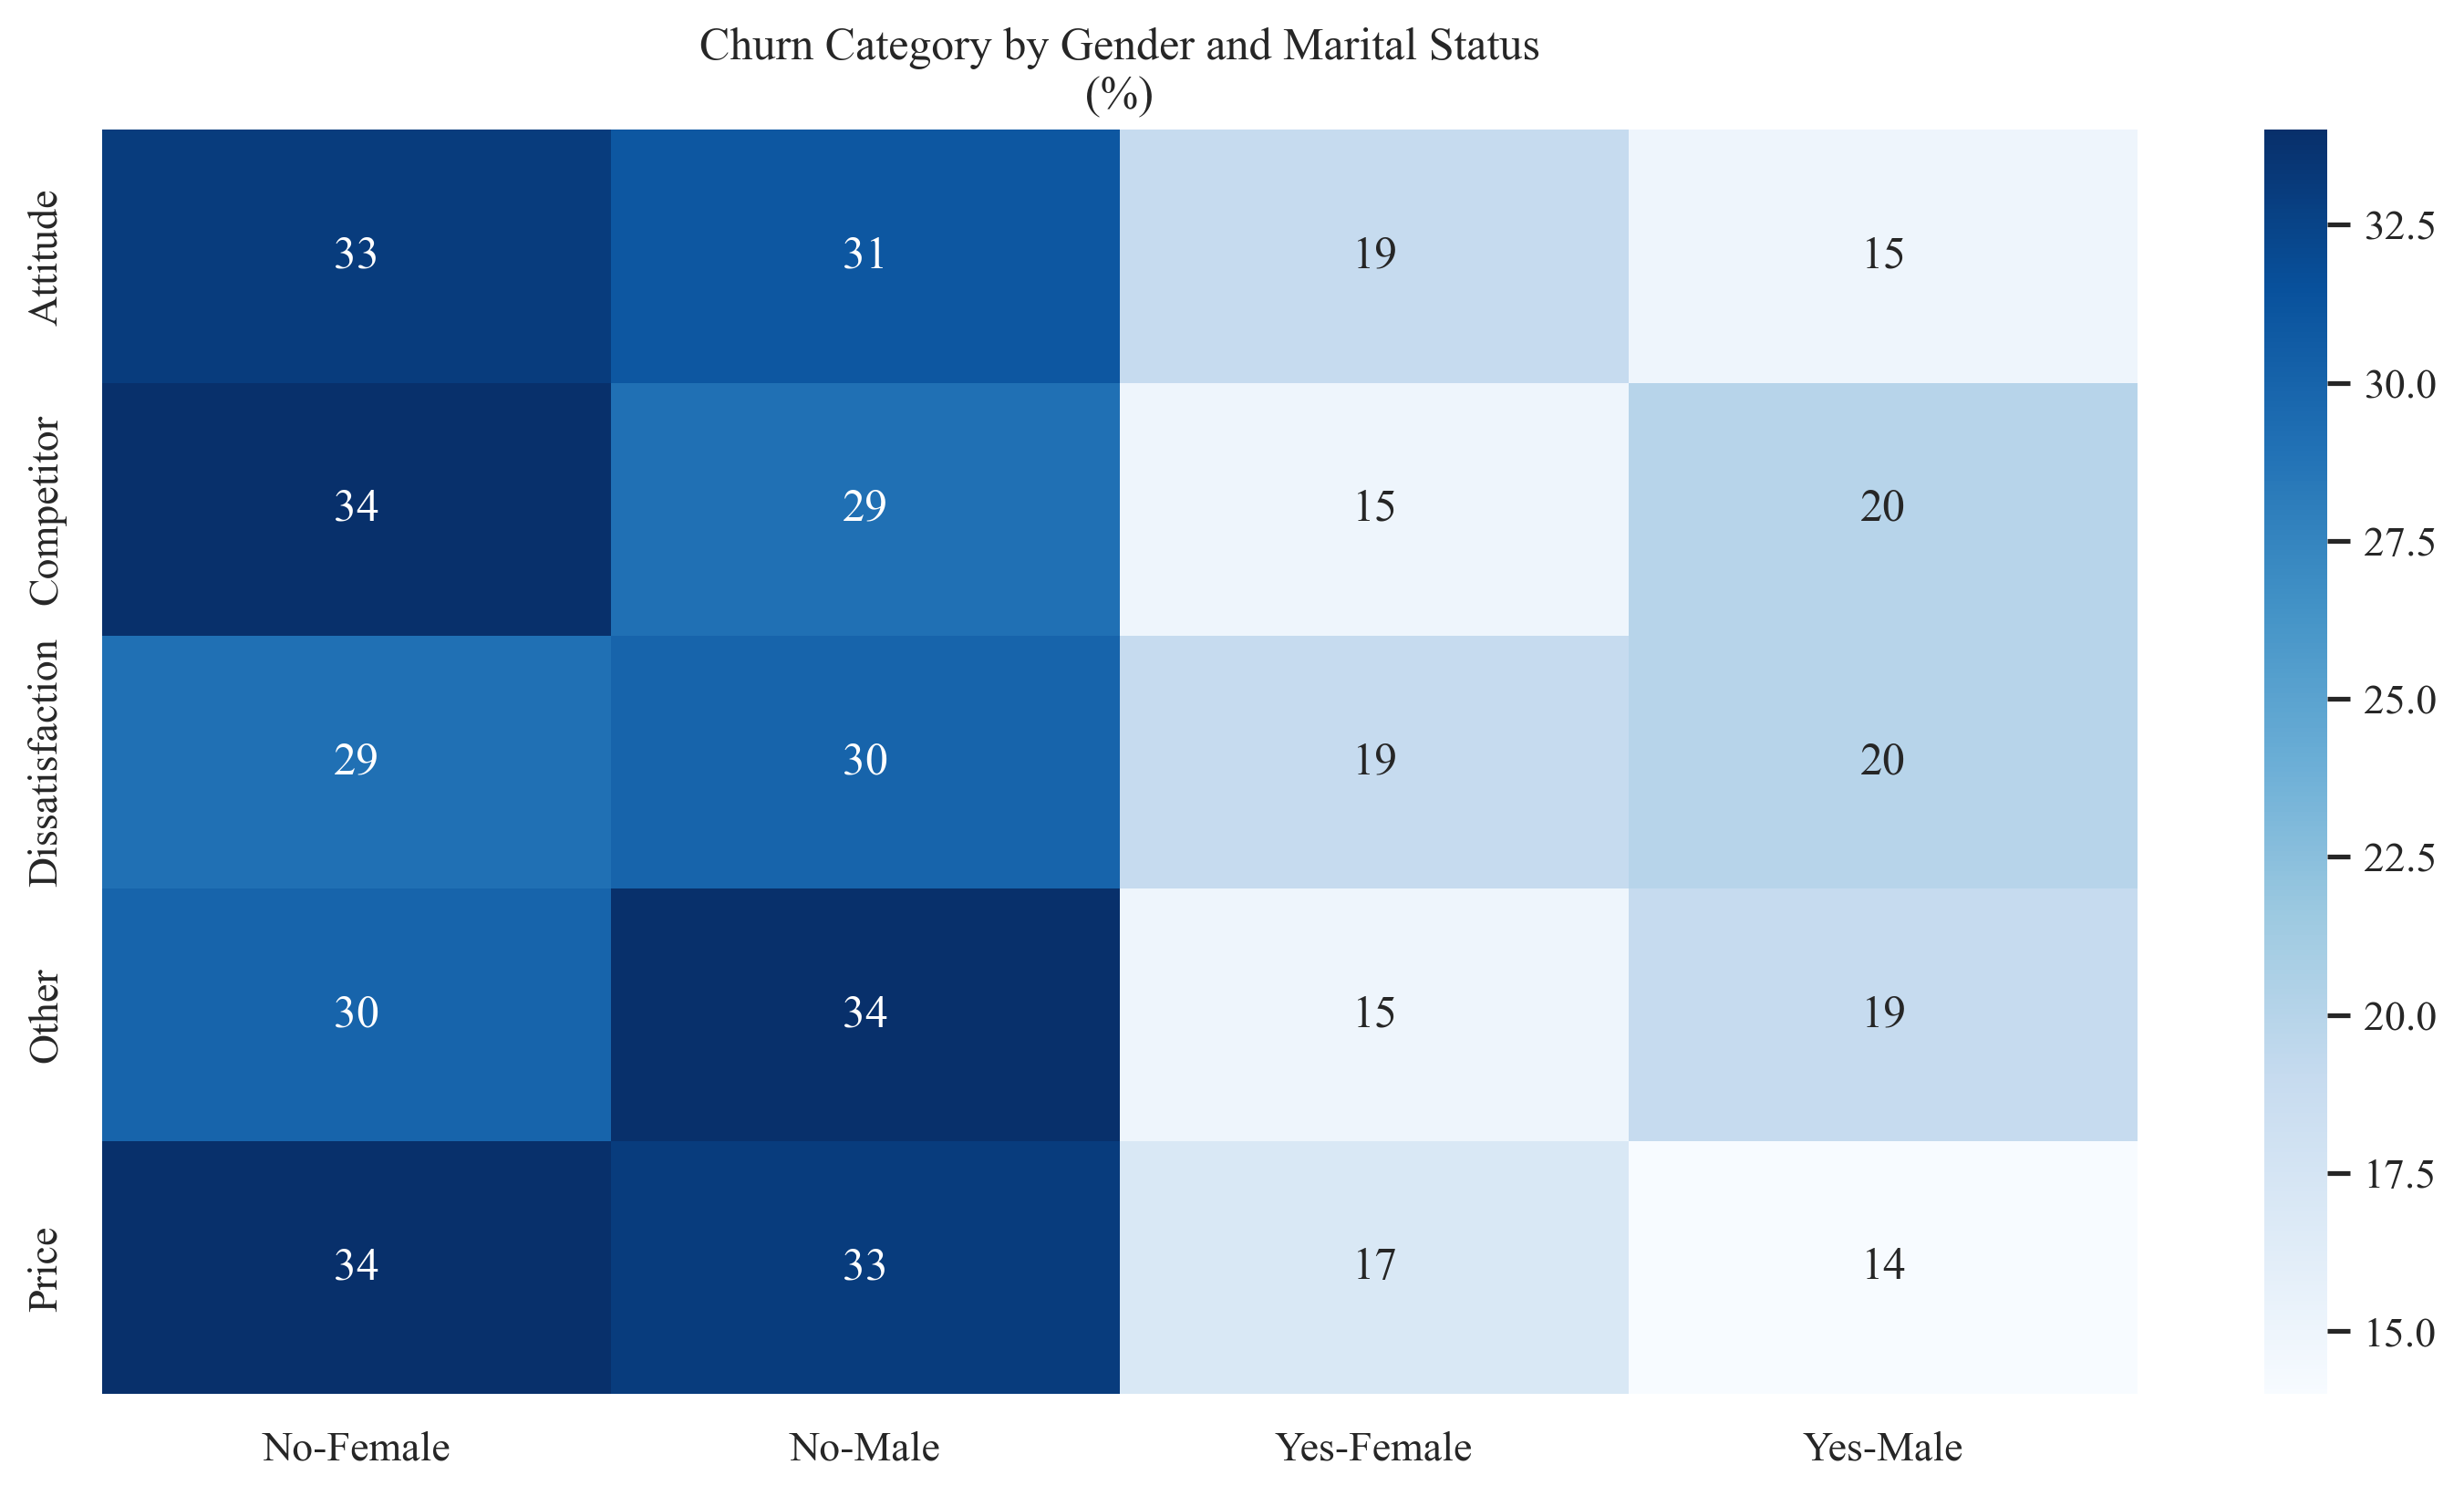

In [14]:
# Define your group, index, and pivot columns
group_columns = ['churn_category', 'married', 'gender']
index_columns = ['churn_category']
pivot_columns = ['married', 'gender']
value_column = 'churn_category'  # Set this to the appropriate column name from your DataFrame

# Plot the heatmap
plot_heatmap(df, group_columns, index_columns, pivot_columns, value_column,title='Churn Category by Gender and Marital Status\n(%)')

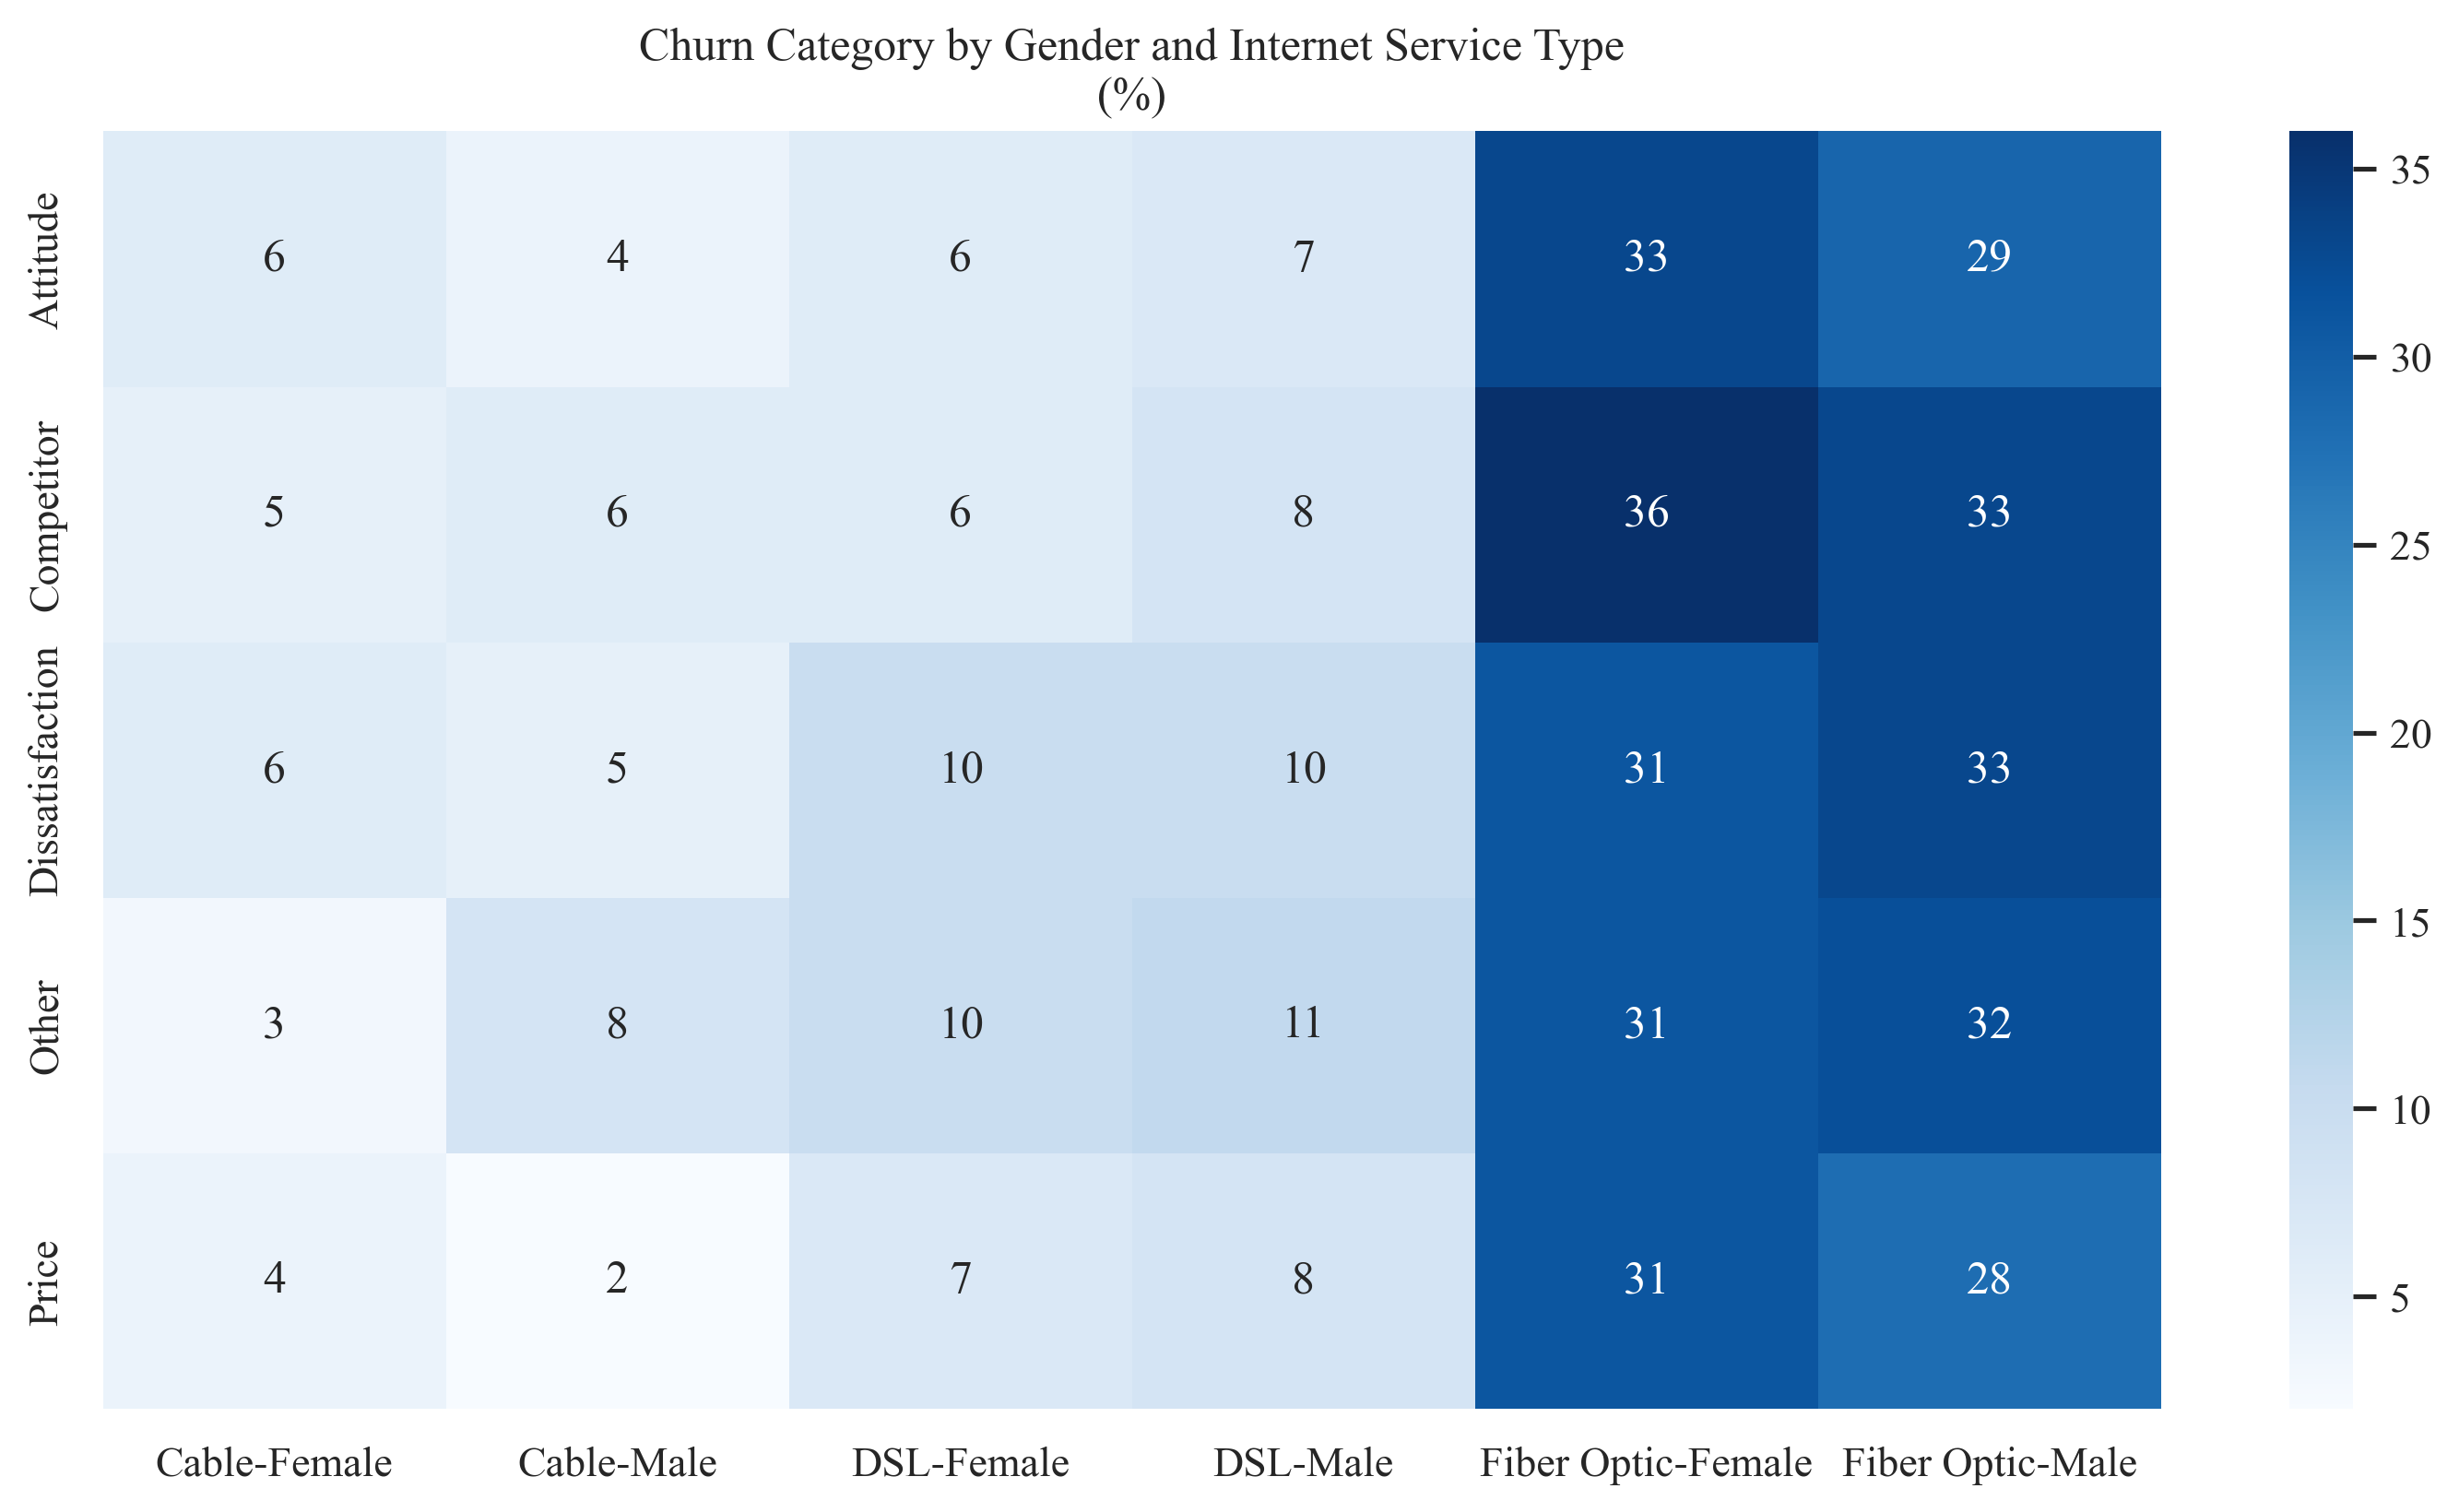

In [15]:
# Define your group, index, and pivot columns
group_columns = ['churn_category', 'internet_type', 'gender']
index_columns = ['churn_category']
pivot_columns = ['internet_type', 'gender']
value_column = 'churn_category'  # Set this to the appropriate column name from your DataFrame

# Plot the heatmap
plot_heatmap(df, group_columns, index_columns, pivot_columns, value_column,title='Churn Category by Gender and Internet Service Type\n(%)')

## Custommer Value Analysis

High value customers were selected based on the number of referrals by a customer and the number of months not less than 12. 

In [16]:
clv_data=df[df['customer_status']=='Churned']
clv_data=clv_data.query("number_of_referrals>0 and tenure_in_months>=12")[['internet_type','customer_id','age','total_revenue','tenure_in_months','churn_reason','churn_category']]\
    .sort_values(by='total_revenue')
clv_data=clv_data.assign(
    clv=lambda x: (x.total_revenue/x.tenure_in_months).round()
)

In [17]:
clv_data=clv_data.dropna()
clv_data

,internet_type,customer_id,age,total_revenue,tenure_in_months,churn_reason,churn_category,clv
6289,DSL,8901-HJXTF,46,309.10,12,Competitor made better offer,Competitor,26.0
3969,DSL,5590-YRFJT,44,482.80,20,Don't know,Other,24.0
5290,DSL,7470-MCQTK,42,633.40,13,Attitude of support person,Attitude,49.0
403,DSL,0601-WZHJF,53,667.70,14,Attitude of service provider,Attitude,48.0
3588,Cable,5087-SUURX,46,669.85,18,Lack of self-service on Website,Dissatisfaction,37.0
...,...,...,...,...,...,...,...,...
6932,Fiber Optic,9835-ZIITK,66,10717.17,66,Competitor made better offer,Competitor,162.0
3752,Fiber Optic,5287-QWLKY,79,10718.96,71,Attitude of support person,Attitude,151.0
1333,Fiber Optic,1984-FCOWB,21,10756.15,70,Attitude of service provider,Attitude,154.0
2282,Fiber Optic,3259-FDWOY,60,11084.84,71,Competitor offered higher download speeds,Competitor,156.0


In [18]:
reasons=clv_data.groupby(['churn_category','churn_reason'])['churn_reason'].unique()
reasons

churn_category   churn_reason                             
Attitude         Attitude of service provider                              [Attitude of service provider]
                 Attitude of support person                                  [Attitude of support person]
Competitor       Competitor had better devices                            [Competitor had better devices]
                 Competitor made better offer                              [Competitor made better offer]
                 Competitor offered higher download speeds    [Competitor offered higher download speeds]
                 Competitor offered more data                              [Competitor offered more data]
Dissatisfaction  Lack of self-service on Website                        [Lack of self-service on Website]
                 Limited range of services                                    [Limited range of services]
                 Network reliability                                                [Network 

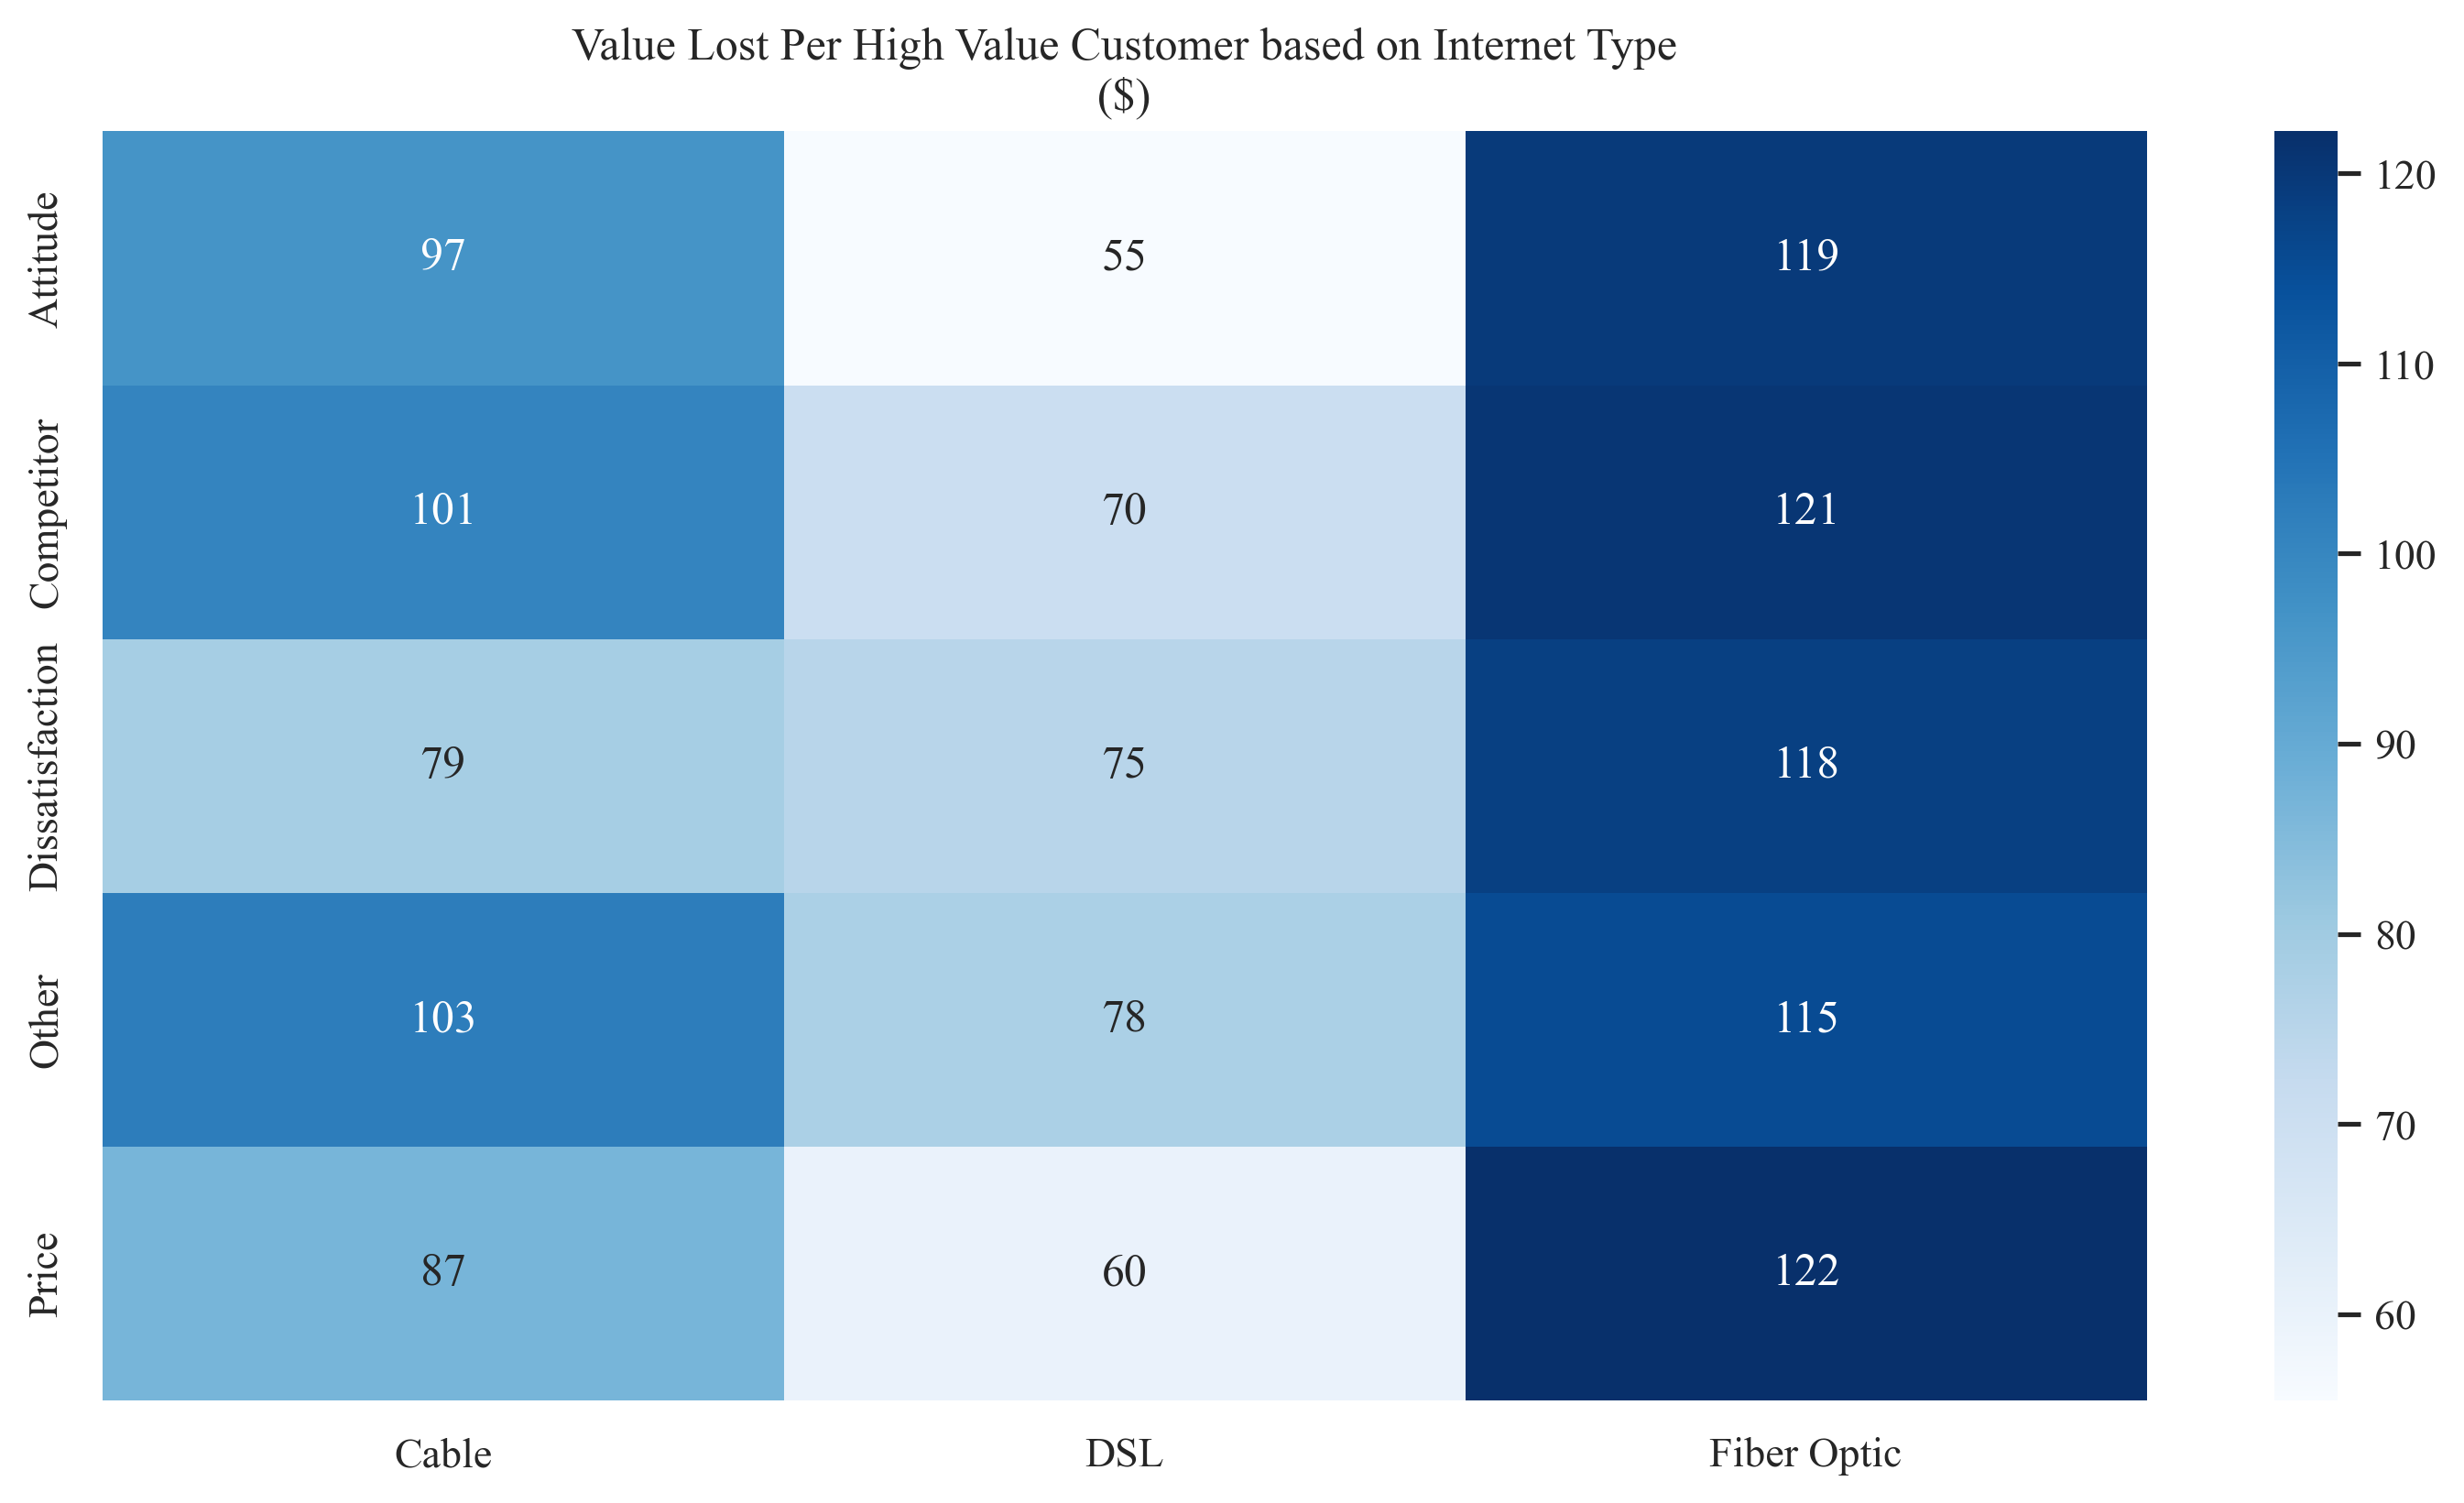

In [19]:
pivoted=clv_data.pivot_table(
    index='churn_category',
    columns='internet_type',
    values='clv',
    aggfunc='mean'
)
sns.heatmap(pivoted,cmap='Blues',annot=True,fmt=',.0f')
plt.title('Value Lost Per High Value Customer based on Internet Type\n($)')
plt.xlabel('')
plt.ylabel('');

## Recommendations

The company is losing a total `$ 271.00` when a high value customer cancels their subscription due to Attitude, `$ 292.00` due to competitors' influence, `$ 154.00` due to dissatisfaction, `$ 269.00` due to subscription charges and `$ 298.00` due to other factors. With Fiber Optic service leading all the categories.

Many high value customers are leaving due to competitors' influence and attitude of customer support agents. The company should come up with a new strategy to counter competitors' influence in the market by:
 - offering better subscription packages
 - improving on internet speed
 - training customer support staff to better address customer issues
 - finally, the company should improve on the fiber optic internet service type